# Integrating sonar and buoy-based temperature data

This notebook provides a workflow to access **NOAA water column sonar data** and integrate and co-visualize with water temperature from a near-by **National Data Buoy Center** buoy, made accessible via **PelicanFS** as part of the **Open Science Data Federation (OSDF)**.

By integrating these two datasets, we aim to provide context on the oceanographic conditions when the sonar data were collected, and more specifically provide information on the environment that the ensonified marine organisms inhabited. 

---

## Overview

Below describes the main topics this notebook will cover
1. **What are water column sonar data?** An overview of these data, how they are collected, who collects them, their role supporting federal resource management.
2. **Why including oceanographic data is important.** Context on what influences the marine organisms captured by the sonar systems.
3. **About the sonar dataset.** Specifics on the sonar data selected for this notebook, including the format, preprocessing steps, and importance
4. **About the buoy dataset.** Specifics on the location and temporal resolution for the temperature datasets selected for this notebook.
5. **About the solar dataset.** Specifics on how solar elevation are extracted for our study area.
6. **Access from PelicanFS.** Where, how, and why to access data from PelicanFS. 
7. **What are our science drivers?** Additional scientific motivation that is driving the project's goals and impact to the scientific community
8. **What's next?** A brief look to the content of the next notebook focused on visualization. 

By the end, readers will have a better understanding of what sonar data are, why integrating other oceangraphic data are important, and how to do that -- all in a Jupyter workflow that leverages data accessible through the OSDF data!

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [What is split-beam sonar?](https://oceanexplorer.noaa.gov/technology/sonar/split-beam.html) | Necessary | Foundational concepts for the sonar data
| [Sonar applications for NOAA](https://storymaps.arcgis.com/stories/e245977def474bdba60952f30576908f) | Helpful | Additional information to understand how and why NOAA collects water column sonar data |
| [Uses of buoy data](https://www.ocean-ops.org/dbcp/data/datauses.html) | Helpful | Information on ocean buoys and what they are used for |
| [What is diel vertical migration?](https://oceanexplorer.noaa.gov/facts/vertical-migration.html) | Helpful | Information on this daily movement of zooplankton (very small fish!) in the water column, that is captured by sonar data | 
| [What is the Pelican Platform?](https://docs.pelicanplatform.org/about-pelican) | Helpful | Familiarity with the Pelican Project |
| [What is the OSDF?](https://osg-htc.org/services/osdf.html) | Helpful | Familiarity with the Open Science Data Federation |

- **Time to learn**: Approximately 35 minutes. More if you're new to the concepts or extra curious!

---

## What are water column sonar data?

The health of our ocean ecosystems are vital to global economies. One way to learn more about our ocean is to examine the water column, which is the volume of water from the ocean surface to the ocean floor. 

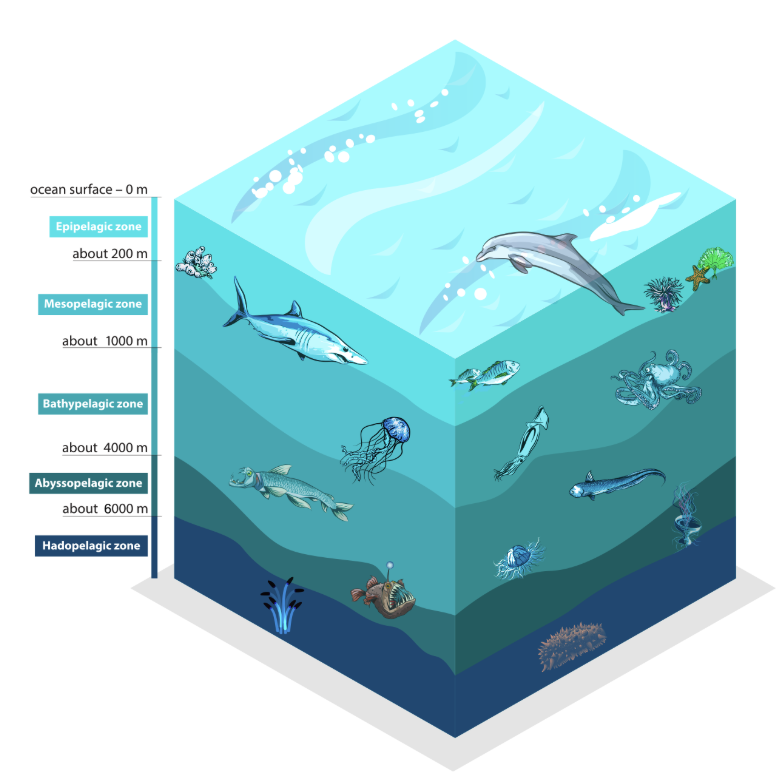

In [9]:
from IPython.display import Image, display
display(Image(filename='../images/water column zones.png'))

_The water column of the open ocean is divided into five zones from the surface to the seafloor. Each zone varies in pressure, light, temperature, oxygen, nutrients, and biological diversity. Credit: Barbara Ambrose, NOAA, from the [Understanding Our Ocean with Water-Column Sonar Data story map](https://storymaps.arcgis.com/stories/e245977def474bdba60952f30576908f)_

Scientists collect data on the water column using sonars. These instruments emit sound ("a ping") at set frequencies that travels down through the water to the seafloor, bouncing or "scattering" off whatever is in it's path. The instruments "listen" for the time and angle of return of the ping to capture information on the pings journey. If you've ever been on a boat that had a fish finder beeping away, these instruments are very similar - just more complex and more expensive. They're scientific fish finders!

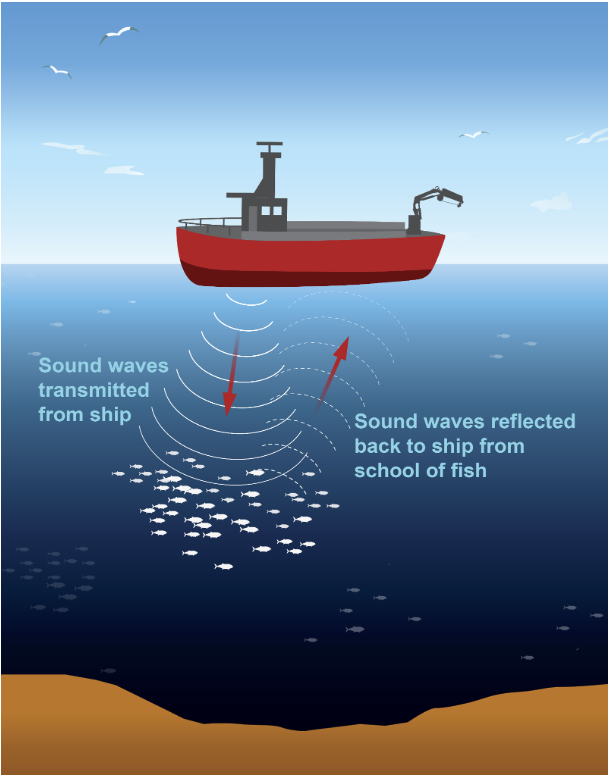

In [3]:
display(Image(filename='../images/sonar graphic.png'))

_Sounds waves transmitted from ships using sonar instruments reflect back to the ship when they have hit an object(s), such as a school of fish. Credit: Barbara Ambrose, NOAA, from the [Understanding Our Ocean with Water-Column Sonar Data story map](https://storymaps.arcgis.com/stories/e245977def474bdba60952f30576908f)_

### Supporting NOAA's mission

NOAA Fisheries routinely use this technology to identify fish schools and estimate biomass for fisheries stock assessments. 

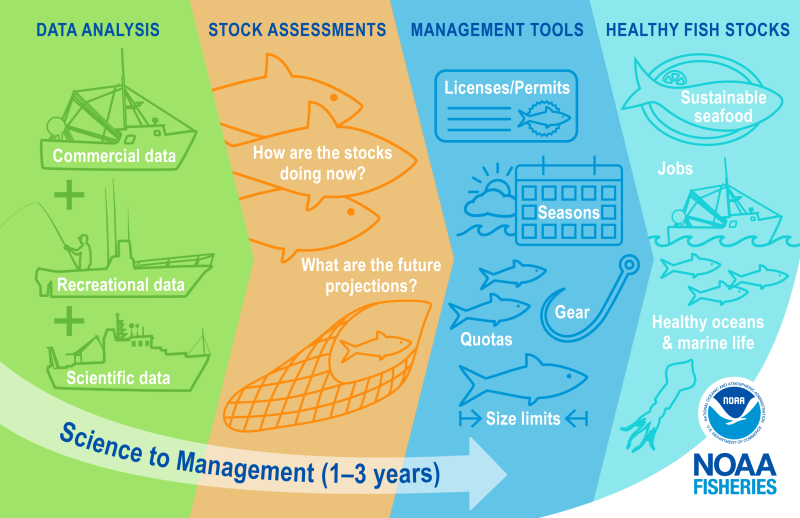

In [4]:
display(Image(filename='../images/Fisheries_Science-to-Mangaement.png'))

_Visualization of the NOAA Fisheries science to management workflow. Credit [NOAA Fisheries website](https://www.fisheries.noaa.gov/)_

Water column sonar systems are integrated on NOAA Fisheries Survey Vessels that traverse the waters of every coast.  

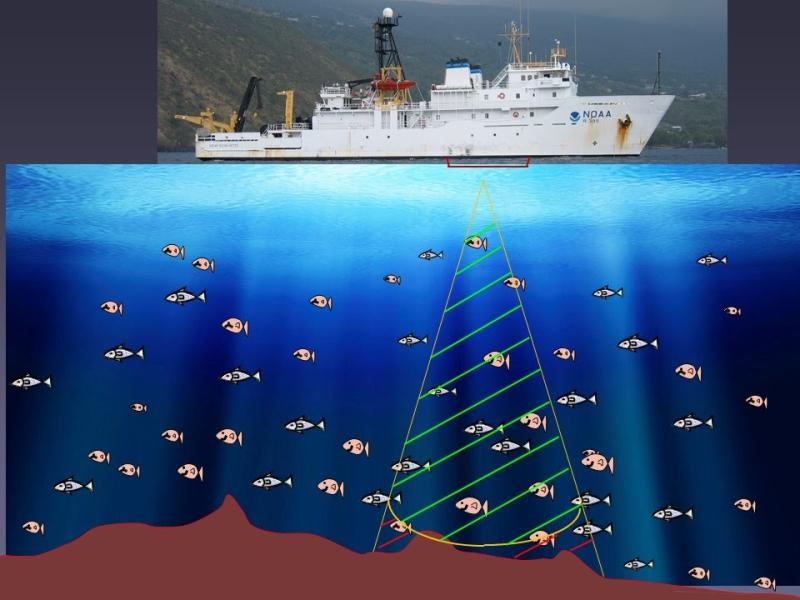

In [5]:
display(Image(filename='../images/Schematics_ActiveAcoustics.jpg'))

_Schematic of NOAA Fisheries survey vessel using water column sonar to map fish. Credit [NOAA Fisheries](https://www.fisheries.noaa.gov/feature-story/using-sound-tool-help-count-snappers-hawaii-and-prevent-overfishing)_

### Centralized repositories and cloud access
Because of their value to our nation, NOAA and other agencies water column sonar data are stewarded at the [NOAA Water Column Sonar Data Archive](https://www.ncei.noaa.gov/products/water-column-sonar-data). This archive currently holds **over 350 TB of data** collected over 20 years in all areas of the U.S. Exclusive Economic Zone. A copy of these archived data are accessible on Amazon Web Services (AWS) through the NOAA Open Data Dissemination Program. 

## Why including oceanographic data is important

Water column sonars provide information about fish and zooplankton inhabiting our waters. These marine organisms are heavily influenced by their surrounding ocenaographic conditions. 

Key drivers include 
* **temperature**
* salinity
* dissoloved oxygen
* productivity
* currents

Fish are also influenced by daily and monthly changes, specifically transitions from **day to night** and **night to day**, and the lunar cycle

## About the sonar dataset

Raw sonar files are complex and binary. To make them more accessible, analysis-ready and cloud-optimized, a subset of the data have been converted into [Zarr stores](https://cires.gitbook.io/zarr). The team is currently focusing on [EK60 sonar systems](https://www.kongsberg.com/discovery/products/discontinued/simrad-ek60/) run on the [NOAA Ship Henry B. Bigelow](https://www.omao.noaa.gov/marine-operations/ships/henry-b-bigelow) by the [NOAA Northeast Fisheries Science Center (NEFSC)](https://www.fisheries.noaa.gov/about/northeast-fisheries-science-center). NEFSC's main objective for collecting these data is to determine the biomass of Atlantic herring _Clupea harengus_, which contributes to the commercial lobster industry. 

You can explore the Zarr translated files using [EchoFish](https://www.echo.fish/), the team's AWS-hosted interactive portal for data exploration.

We have selected a subset of data from NEFSC's HB1906 survey, specifically from October 16, 2019.

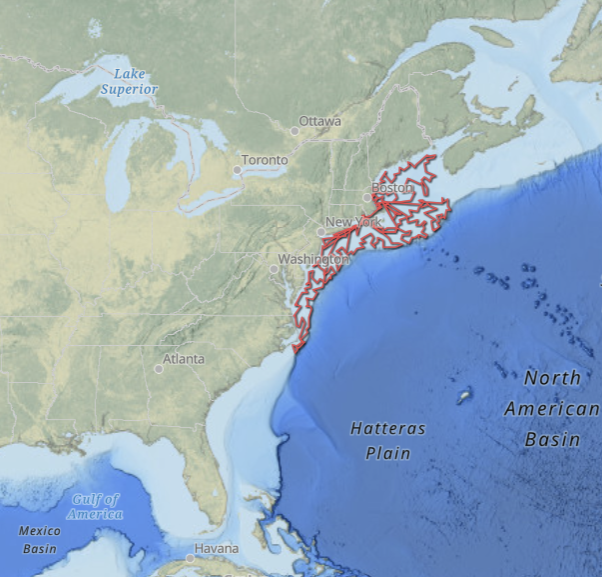

In [6]:
display(Image(filename='../images/HB1906.png'))

_Geographic location for the NEFSC HB1906 cruise off the northeast coast of the U.S. Credit [NOAA Water Column Sonar Data Archive](https://www.ncei.noaa.gov/maps/water-column-sonar/?instrument=EK60&survey=HB1906)_

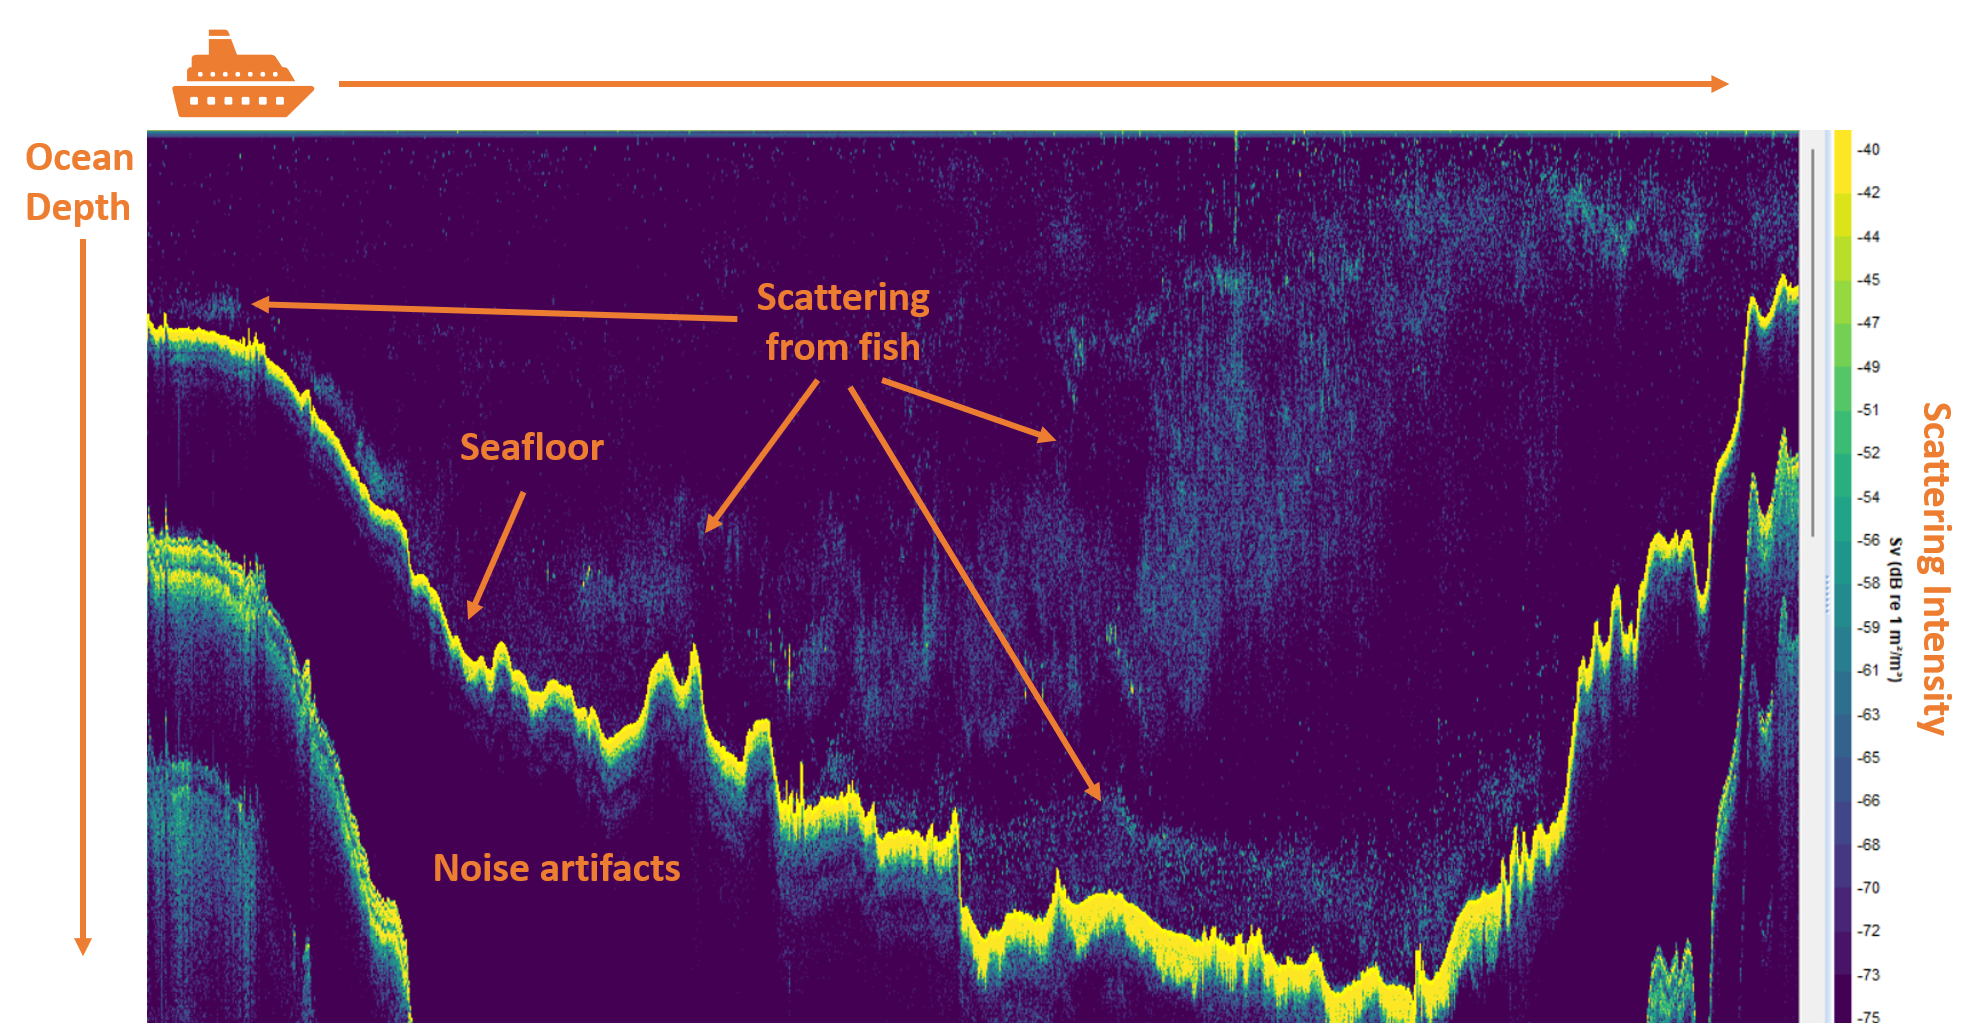

In [10]:
display(Image(filename='../images/HB1906_16Oct2019_afternoon_labeled.png'))

_Visualization of the HB1906 38 kHz sonar data used in the analysis._

## About the buoy dataset

We will pull data from the [NDBC stion 44005](https://www.ndbc.noaa.gov/station_page.php?station=44005) located on George's Bank near Nantuck Shoals. This buoy records multiple variables continuously from it's moored location.

Some of the data available on this buoy recorded at the ocean surface include
* **water temperature**
* wind speed, direction, and gust
* wave height and direction
* air temperature

## About the solar dataset

We use an API to call the solar position based on the defined date and location (using latitude and longitude). The **solar elevation** in degrees and solar azimuth in degrees are outputted. We use the solar elevation in our plots but solar azimuth could be used instead.

## Access from PelicanFS

We will access it directly in the next notebook using **PelicanFS**, a high-performance file system interface developed by the [OSG](https://osg-htc.org/) and Pathfinders community.

Additional details of PelicanFS can be found in Chapter 1 - PelicanFS

## What are our science drivers?

We aim to explore the correlation between patterns extracted from the sonar data and the associated ocean temperature.

As we expand our workflow to longer time periods, larger areas, and multiple years, we will be able to further examine
* Seasonal and interannual variability in biological assemblages (i.e., fish and zooplankton) 
* Spatial variability in biological assemblages
* The influence of water temperature on marine organisms  


---

## Summary
Throughout this notebook, we introduced the objectives, approach, and value of integrating water column sonar with oceanographic data. We reviewed the collection methods and availability of both sonar and buoy datasets, as well as their accessibility through PelicanFS. Readers should now understand what water column sonar data are and why they are important to NOAA, resource management, and supporting healthy oceans. They will also be familiar with oceanographic datasets that can provide additional context for interpreting patterns of marine organisms observed in the sonar data.



## Resources and references
* [NOAA Water Column Sonar Data](https://www.ncei.noaa.gov/products/water-column-sonar-data)
* [Northeast Ecosystem Surveys](https://www.fisheries.noaa.gov/about/northeast-ecosystems-surveys)

## What's Next?
In the next notebook, we will 
* **Access and read zarr-translated sonar data** for a subset of data archived at NCEI and accessible through the NOAA AWS bucket.
* **Pull temperature data from a NDBC buoy** located in close proximity to where the sonar data were collected in the Gulf of Maine.
* **Calculate the solar elevation** based on the corresponding time and space of the sonar data. 
* **Import a map of sonar clusters** previously calculated using a U-Net. 
* **Calculate hourly acoustic backscattering values (Sv)** from the zarr files, including on the values associated with the cluster regions and above the detected seafloor
* **Visualize the results** by co-plotting the time series of water temperature, solar elevation, and Sv with the cluster map